In [1]:
!pip install mftool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 4.7 MB/s eta 0:00:00
  Created wheel for mftool: filename=mftool-2.8-py3-none-any.whl size=116617 sha256=b53aa76bd12ed236a9343dc60453738e32814cda78ecf1048e3962ac66092761
  Stored in directory: /root/.cache/pip/wheels/b6/b3/af/5751d41db5452227e221aaca7f1ec823caa51ae7d40fb9dbde
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=293633 sha256=b603beab9b76ef5d5eb47854a5792becee313d43098f9e3ad94d4b35adef8964
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built mfto

In [2]:
import pandas as pd
import numpy as np
from mftool import Mftool
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime as dt
# %matplotlib notebook

In [3]:
# %matplotlib notebook
# from ipywidgets import *

In [4]:
mf=Mftool()

In [5]:
schemes=mf.get_available_schemes('bandhan')

In [6]:
# schemes

In [7]:
# '147946': 'BANDHAN SMALL CAP FUND - DIRECT PLAN GROWTH',
sch_code, sch_name='147946','BANDHAN SMALL CAP FUND - DIRECT PLAN GROWTH'


d1 = mf.get_scheme_quote(sch_code)
d2 = mf.get_scheme_details(sch_code)
print(d1)
print(d2)

{'scheme_code': '147946', 'scheme_name': 'BANDHAN SMALL CAP FUND - DIRECT PLAN GROWTH', 'last_updated': '30-Aug-2024', 'nav': '50.841'}
{'fund_house': 'Bandhan Mutual Fund', 'scheme_type': 'Open Ended Schemes', 'scheme_category': 'Equity Scheme - Small Cap Fund', 'scheme_code': 147946, 'scheme_name': 'BANDHAN SMALL CAP FUND - DIRECT PLAN GROWTH', 'scheme_start_date': {'date': '26-02-2020', 'nav': '10.00000'}}


In [8]:
df = mf.get_scheme_historical_nav(sch_code,as_Dataframe=True).reset_index()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1113 non-null   object 
 1   nav        1113 non-null   object 
 2   dayChange  1112 non-null   float64
dtypes: float64(1), object(2)
memory usage: 26.2+ KB


In [10]:
df['date']=pd.to_datetime(df.date)

/tmp/ipykernel_17/1099506490.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date']=pd.to_datetime(df.date)


In [11]:

mf_df=df[(df.date.dt.date<=date.today()) & (df.date.dt.date>date.today()+timedelta(days=-90))].sort_values(by='date').copy()

In [12]:
mf_df.set_index("date",inplace=True)

In [13]:
mf_df

,nav,dayChange
date,,
2024-06-03,41.11200,0.739
2024-06-04,38.50000,-2.612
2024-06-05,39.77300,1.273
2024-06-06,40.76100,0.988
2024-06-07,41.70700,0.946
...,...,...
2024-08-26,50.24600,0.172
2024-08-27,50.53500,0.289
2024-08-28,50.60200,0.067


In [14]:
mf_df["nav"]=mf_df.nav.astype(float)

In [15]:
mf_df.sort_values(by="date",inplace=True)

In [16]:
mf_df

,nav,dayChange
date,,
2024-06-03,41.112,0.739
2024-06-04,38.500,-2.612
2024-06-05,39.773,1.273
2024-06-06,40.761,0.988
2024-06-07,41.707,0.946
...,...,...
2024-08-26,50.246,0.172
2024-08-27,50.535,0.289
2024-08-28,50.602,0.067


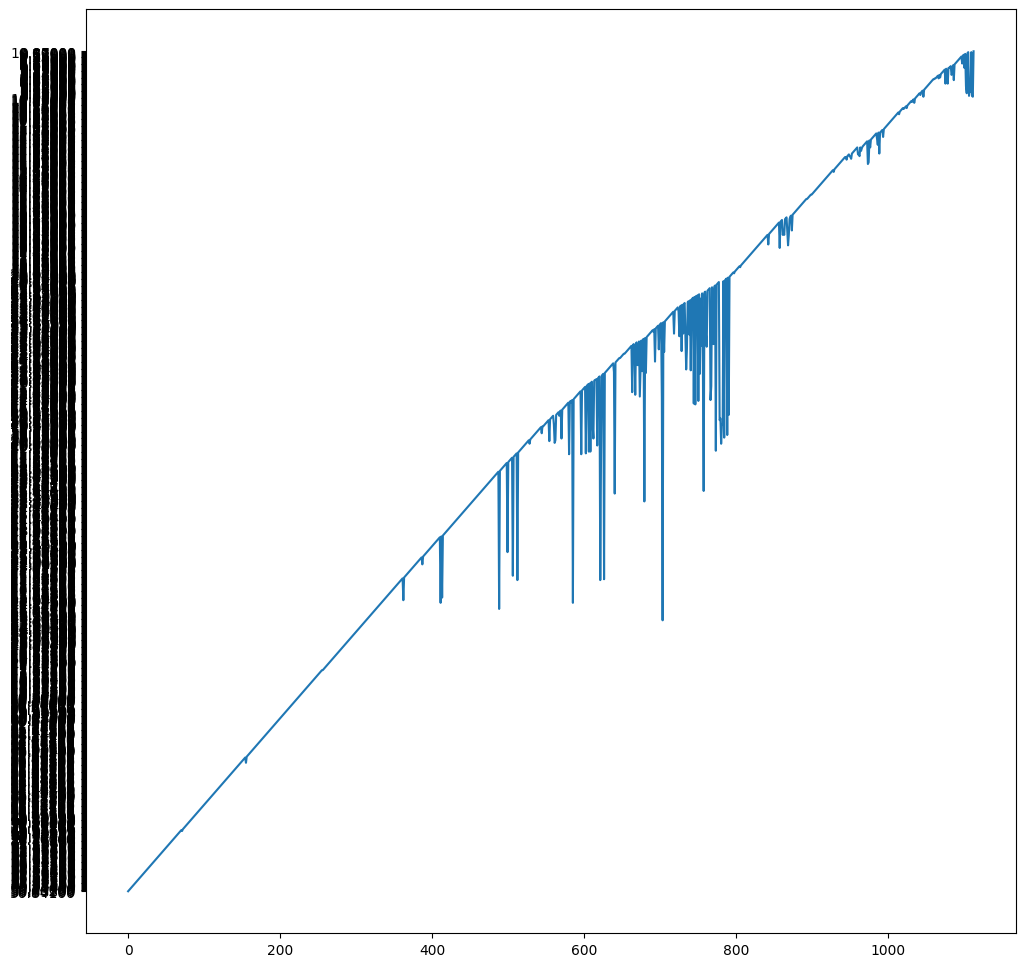

In [17]:
plt.figure(figsize=(12,12))
plt.plot(df['nav'],label='Historical Nav')
plt.show()


In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
model=ARIMA(mf_df['nav'],order=(5,1,0))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
model_fit=model.fit()

In [21]:
forecast=model_fit.forecast(steps=30)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [22]:
forecast_dates= \
[mf_df.index[-1]+timedelta(days=i) for i in range(1,31)]

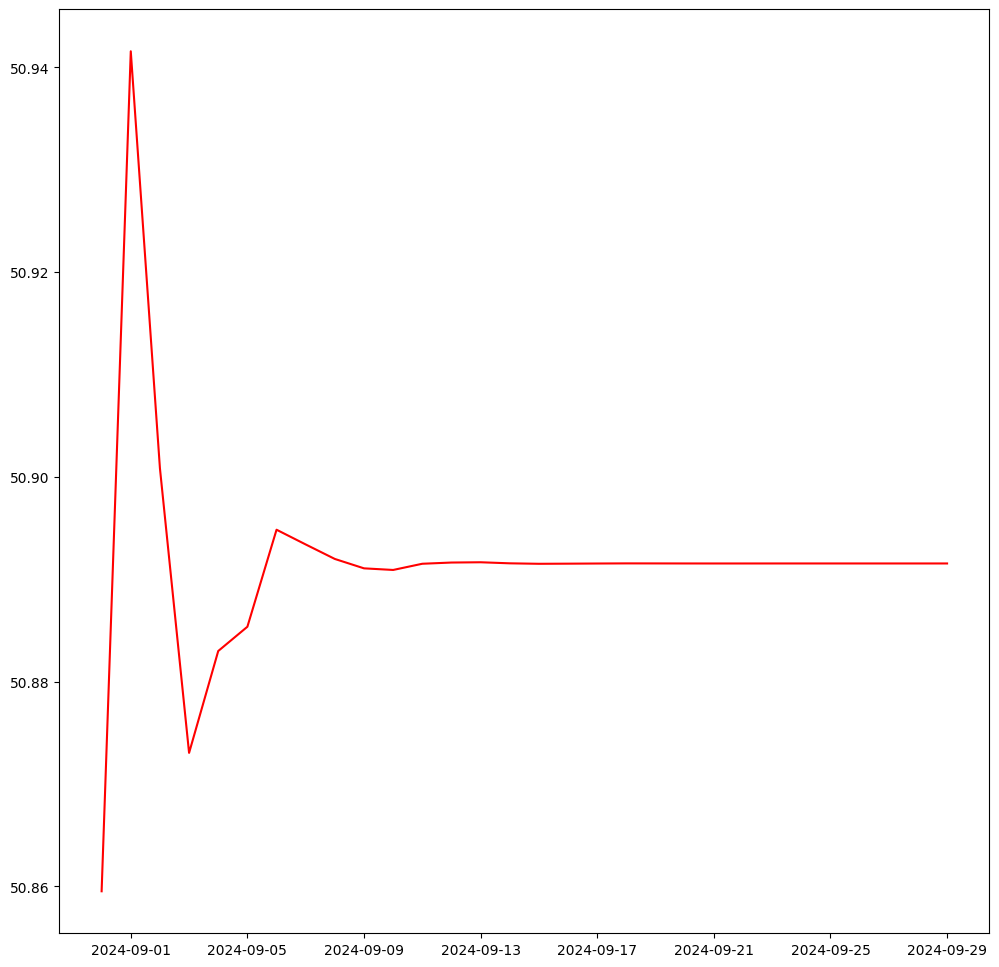

In [23]:
plt.figure(figsize=(12,12))
plt.plot(forecast_dates,forecast,color='red',label="Predicted NAV")

In [24]:
forecast

63    50.859528
64    50.941574
65    50.900847
66    50.873045
67    50.882996
68    50.885366
69    50.894843
70    50.893403
71    50.891987
72    50.891070
73    50.890913
74    50.891519
75    50.891637
76    50.891664
77    50.891561
78    50.891515
79    50.891528
80    50.891543
81    50.891555
82    50.891552
83    50.891548
84    50.891546
85    50.891546
86    50.891547
87    50.891548
88    50.891547
89    50.891547
90    50.891547
91    50.891547
92    50.891547
Name: predicted_mean, dtype: float64

In [25]:
# threshold=50.0
!pip install mplcursors
import mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 859.2 kB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20728 sha256=8dadec640c0abe649602f7d5fb1cdff51598b0f4166a016e9cf17a6c83147b00
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors


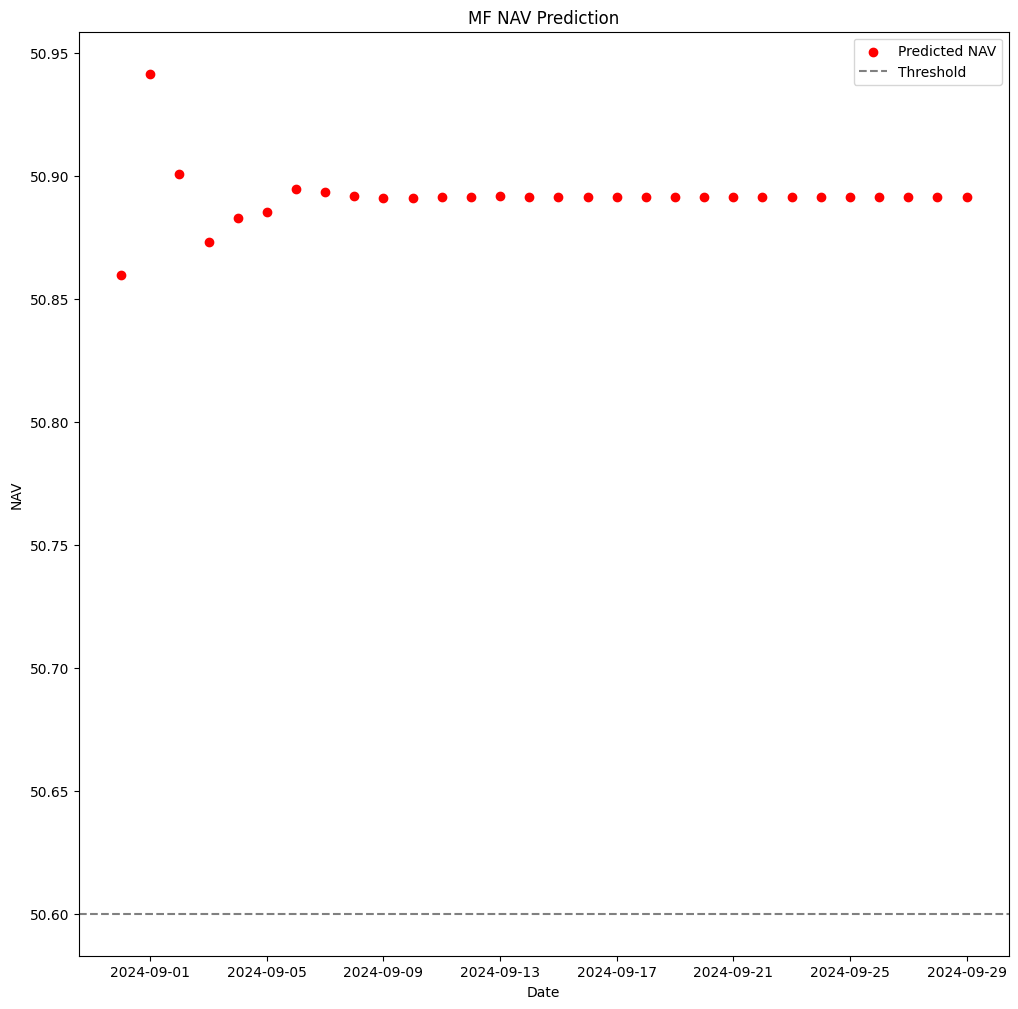

In [26]:

threshold=50.6
plt.figure(figsize=(12,12))
plt.scatter(forecast_dates,forecast,color='red',label="Predicted NAV")
plt.axhline(y=threshold,color='gray',linestyle='--',label="Threshold")
plt.title('MF NAV Prediction')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.legend()
plt.show()

In [27]:
import plotly.graph_objs as go
import plotly.express as px


threshold=50.6


# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=forecast_dates, y=forecast,name="Predicted NAV", mode='markers+lines', text=[f'({yi})' for xi, yi in zip(forecast_dates, forecast)], hoverinfo='text'))

# Add labels and title


# Add a threshold line
# threshold_value = 25
fig.add_shape(
    type='line',
    x0=min(forecast_dates), x1=max(forecast_dates),
    y0=threshold, y1=threshold,
    line=dict(color='Red', dash='dash'),
    name='Threshold'
)

fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='lines',
    line=dict(color='Red', dash='dash'),
    name='Threshold Line'
))

fig.update_layout(
    title='MF NAV Prediction',
    xaxis_title='Date',
    yaxis_title='NAV',showlegend=True
)

# Show the plot
fig.show()
